In [12]:
import pandas as pd
import matplotlib

In [13]:
file = 'nhes_16_ecpp_v1_0.csv'

In [14]:
df = pd.read_csv(file)
print(df.head())

        BASMID PATH  QTYPE  RCNOW  RCWEEK  RCTYPE  RCAGE  RCPLACE  RCDAYS  \
0  20161000052    N      3      2      -1      -1     -1       -1      -1   
1  20161000169    N      3      2      -1      -1     -1       -1      -1   
2  20161000202    N      3      1       1       1     78        3       2   
3  20161000208    I      3      2      -1      -1     -1       -1      -1   
4  20161000236    I      3      2      -1      -1     -1       -1      -1   

   RCHRS  ...  F_HMEDICAID  F_HCHIP  F_HSECN8  F_TTLHHINC  F_YRSADDR  \
0     -1  ...            0        0         0           0          0   
1     -1  ...            0        0         0           0          0   
2      5  ...            0        0         0           0          0   
3     -1  ...            0        0         0           0          0   
4     -1  ...            0        0         0           0          0   

   F_OWNRNTHB  F_HVINTSPHO  F_HVINTCOM  F_USEINTRNT  F_HHUNID  
0           0            0           0  

In [15]:
print(list(df))

['BASMID', 'PATH', 'QTYPE', 'RCNOW', 'RCWEEK', 'RCTYPE', 'RCAGE', 'RCPLACE', 'RCDAYS', 'RCHRS', 'RCSTRTY', 'RCSTRTM', 'RCSPEAK', 'RCSKNFV', 'RCSKFV', 'RCFEE', 'RCREL', 'RCTANF', 'RCSSAC', 'RCEMPL', 'RCOTHER', 'RCCOST', 'RCUNIT', 'RCCSTHNX', 'RCOTHC', 'RCTLHR', 'NCNOW', 'NCWEEK', 'NCPLACE', 'NCINHH', 'NCDAYS', 'NCHRS', 'NCSTRTY', 'NCSTRTM', 'NCALKNE', 'NCAGE', 'NCSPEAK', 'NCSKNFV', 'NCSKFV', 'NCRCMDPT', 'NCFEE', 'NCREL', 'NCTANF', 'NCSSAC', 'NCEMPL', 'NCOTHER', 'NCCOST', 'NCUNIT', 'NCCSTHNX', 'NCOTHC', 'NCTLHR', 'CPNNOWX', 'CPWEEKX', 'CPTYPE', 'CPHEADST', 'CPPLACEX', 'CPSPRLG', 'CPWORK', 'CPDAYS', 'CPHRS', 'CPSTRTY', 'CPSTRTM', 'CPSPEAK', 'CPRCMDPT', 'CPTEST', 'CPPHYSE', 'CPDENTA', 'CPDISAB', 'CPSKNFV', 'CPSKFV', 'CPFEE', 'CPREL', 'CPTANF', 'CPSSAC', 'CPEMPL', 'CPOTHER', 'CPCOST', 'CPUNIT', 'CPCSTHNX', 'CPOTHC', 'CPTLHR', 'PCEVRHDX', 'MAINRESN', 'PPCHOIC', 'PPDIFCLT', 'WHYDIFCLT', 'DCLOA', 'DCOST', 'DRELY', 'DLERN', 'DCHIL', 'DHROP', 'DNBGRP', 'DRTWEB', 'DRECFAM', 'DRELOR', 'HABOOKS', '

In [20]:
col = 'RCPLACE' 
col_name = 'care_for_child' #<-edit this value! descriptive name for column
freq = df[col].value_counts().rename_axis(col_name).reset_index(name='freq')
freq = freq.sort_values(by = col_name)
print(freq)

   care_for_child  freq
0              -1  4376
1               1   662
2               2   557
3               3   249


In [21]:
codebook = [['-1', 'Valid Skip'],
            ['1', 'own home'],
            ['2', 'other home'], 
            ['3', 'both']]

for lbl in codebook:
    freq[col_name] = freq[col_name].replace(int(lbl[0]), lbl[1])

print(freq)

  care_for_child  freq
0     Valid Skip  4376
1       own home   662
2     other home   557
3           both   249


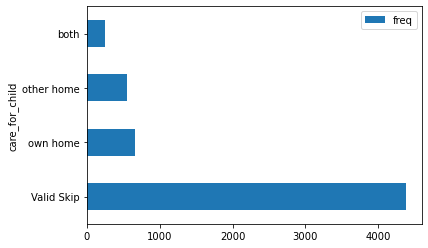

In [19]:
ax = freq.plot.barh(x=col_name, y='freq', rot=0)